In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
DIRECTORY = '/home/jrm/Adjeroh/Naved/Process100.all/'
FILE = 'Process100_ShrinkRBC.csv'

Populate a data frame and describe it. The file contains one line per object. Here, object = RBC.

In [3]:
object_df = pd.read_csv(DIRECTORY+FILE)
print(type(object_df))
object_df.describe()
# There 1577 lines in this file i.e. 1577 RBC objects

<class 'pandas.core.frame.DataFrame'>


,ImageNumber,ObjectNumber,Children_MergeRBC_Count,Location_Center_X,Location_Center_Y,Number_Object_Number
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,306.608751,12.388713,0.315155,148.235143,146.386272,12.388713
std,148.676192,11.809312,0.464725,74.562287,74.335949,11.809312
min,4.000000,1.000000,0.000000,9.118750,10.652632,1.000000
25%,200.000000,3.000000,0.000000,83.923077,83.946237,3.000000
50%,354.000000,9.000000,0.000000,147.481407,141.220798,9.000000
75%,386.000000,18.000000,1.000000,212.625641,210.672713,18.000000
max,600.000000,61.000000,1.000000,288.952607,287.463602,61.000000


To get number of objects per patch, group by patch. Show cumulative quartiles and cumulative deciles.

In [4]:
patch_count_df=object_df.groupby(['ImageNumber']).count()
patch_count_df.describe()
# There were 203 distinct patches in this file (CellProfiler omitted patches with no objects).
# There were 7.8 +/- 11 objects per patch.

,ObjectNumber,Children_MergeRBC_Count,Location_Center_X,Location_Center_Y,Number_Object_Number
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,7.768473,7.768473,7.768473,7.768473,7.768473
std,11.179480,11.179480,11.179480,11.179480,11.179480
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000
75%,8.500000,8.500000,8.500000,8.500000,8.500000
max,61.000000,61.000000,61.000000,61.000000,61.000000


In [5]:
patch_mean_df=object_df.groupby(['ImageNumber']).mean()
patch_mean_df.describe()

,ObjectNumber,Children_MergeRBC_Count,Location_Center_X,Location_Center_Y,Number_Object_Number
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,4.384236,0.696594,149.549857,150.588967,4.384236
std,5.589740,0.347035,67.600580,63.912538,5.589740
min,1.000000,0.016393,12.484375,18.561972,1.000000
25%,1.000000,0.357143,96.940931,106.364183,1.000000
50%,2.000000,0.857143,146.182482,144.353394,2.000000
75%,4.750000,1.000000,196.997015,192.472253,4.750000
max,31.000000,1.000000,286.440678,287.463602,31.000000


In [6]:
patch_view=object_df.groupby(['ImageNumber'])
print(type(patch_view))  # this is a view of the data, not a dataframe
patch_view.describe()
# The describe() outputs use hierarchical column names.

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


ObjectNumber                                                \
                   count  mean       std  min   25%   50%    75%   max   
ImageNumber                                                              
4                    7.0   4.0  2.160247  1.0  2.50   4.0   5.50   7.0   
7                    6.0   3.5  1.870829  1.0  2.25   3.5   4.75   6.0   
11                   1.0   1.0       NaN  1.0  1.00   1.0   1.00   1.0   
14                  28.0  14.5  8.225975  1.0  7.75  14.5  21.25  28.0   
15                   7.0   4.0  2.160247  1.0  2.50   4.0   5.50   7.0   
...                  ...   ...       ...  ...   ...   ...    ...   ...   
582                  2.0   1.5  0.707107  1.0  1.25   1.5   1.75   2.0   
583                  1.0   1.0       NaN  1.0  1.00   1.0   1.00   1.0   
597                  1.0   1.0       NaN  1.0  1.00   1.0   1.00   1.0   
598                  1.0   1.0       NaN  1.0  1.00   1.0   1.00   1.0   
600                  1.0   1.0       NaN  1.0  1.00   1.0   1.00   1.0   

            Children_MergeRBC_Count            ... Location_Center_Y  \
                              count      mean  ...               75%   
ImageNumber                                    ...                     
4                               7.0  0.571429  ...         65.921297   
7                               6.0  0.833333  ...        249.137719   
11                              1.0  1.000000  ...        111.107744   
14                             28.0  0.142857  ...        146.361438   
15                              7.0  0.857143  ...        163.999231   
...                             ...       ...  ...               ...   
582                             2.0  0.500000  ...         46.971356   
583                             1.0  1.000000  ...        266.434555   
597                             1.0  1.000000  ...        250.493464   
598                             1.0  1.000000  ...        251.513725   
600                             1.0  1.000000  ...        231.912000   

                        Number_Object_Number                                   \
                    max                count  mean       std  min   25%   50%   
ImageNumber                                                                     
4            152.010309                  7.0   4.0  2.160247  1.0  2.50   4.0   
7            266.417249                  6.0   3.5  1.870829  1.0  2.25   3.5   
11           111.107744                  1.0   1.0       NaN  1.0  1.00   1.0   
14           249.675743                 28.0  14.5  8.225975  1.0  7.75  14.5   
15           270.750000                  7.0   4.0  2.160247  1.0  2.50   4.0   
...                 ...                  ...   ...       ...  ...   ...   ...   
582           47.498438                  2.0   1.5  0.707107  1.0  1.25   1.5   
583          266.434555                  1.0   1.0       NaN  1.0  1.00   1.0   
597          250.493464                  1.0   1.0       NaN  1.0  1.00   1.0   
598          251.513725                  1.0   1.0       NaN  1.0  1.00   1.0   
600          231.912000                  1.0   1.0       NaN  1.0  1.00   1.0   

                          
               75%   max  
ImageNumber               
4             5.50   7.0  
7             4.75   6.0  
11            1.00   1.0  
14           21.25  28.0  
15            5.50   7.0  
...            ...   ...  
582           1.75   2.0  
583           1.00   1.0  
597           1.00   1.0  
598           1.00   1.0  
600           1.00   1.0  

[203 rows x 40 columns]

In [7]:
# Quartiles (above) is the default.
# To get deciles instead, pass a list of delimiters to describe().
DECILES=[x/10 for x in range(1,10,1)]
print(DECILES)
patch_deciles=patch_view.describe(percentiles=DECILES)
print(type(patch_deciles))
patch_deciles

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
<class 'pandas.core.frame.DataFrame'>


ObjectNumber                                                  \
                   count  mean       std  min  10%  20%  30%   40%   50%   
ImageNumber                                                                
4                    7.0   4.0  2.160247  1.0  1.6  2.2  2.8   3.4   4.0   
7                    6.0   3.5  1.870829  1.0  1.5  2.0  2.5   3.0   3.5   
11                   1.0   1.0       NaN  1.0  1.0  1.0  1.0   1.0   1.0   
14                  28.0  14.5  8.225975  1.0  3.7  6.4  9.1  11.8  14.5   
15                   7.0   4.0  2.160247  1.0  1.6  2.2  2.8   3.4   4.0   
...                  ...   ...       ...  ...  ...  ...  ...   ...   ...   
582                  2.0   1.5  0.707107  1.0  1.1  1.2  1.3   1.4   1.5   
583                  1.0   1.0       NaN  1.0  1.0  1.0  1.0   1.0   1.0   
597                  1.0   1.0       NaN  1.0  1.0  1.0  1.0   1.0   1.0   
598                  1.0   1.0       NaN  1.0  1.0  1.0  1.0   1.0   1.0   
600                  1.0   1.0       NaN  1.0  1.0  1.0  1.0   1.0   1.0   

                   ... Number_Object_Number                                    \
              60%  ...                  10%  20%  30%   40%   50%   60%   70%   
ImageNumber        ...                                                          
4             4.6  ...                  1.6  2.2  2.8   3.4   4.0   4.6   5.2   
7             4.0  ...                  1.5  2.0  2.5   3.0   3.5   4.0   4.5   
11            1.0  ...                  1.0  1.0  1.0   1.0   1.0   1.0   1.0   
14           17.2  ...                  3.7  6.4  9.1  11.8  14.5  17.2  19.9   
15            4.6  ...                  1.6  2.2  2.8   3.4   4.0   4.6   5.2   
...           ...  ...                  ...  ...  ...   ...   ...   ...   ...   
582           1.6  ...                  1.1  1.2  1.3   1.4   1.5   1.6   1.7   
583           1.0  ...                  1.0  1.0  1.0   1.0   1.0   1.0   1.0   
597           1.0  ...                  1.0  1.0  1.0   1.0   1.0   1.0   1.0   
598           1.0  ...                  1.0  1.0  1.0   1.0   1.0   1.0   1.0   
600           1.0  ...                  1.0  1.0  1.0   1.0   1.0   1.0   1.0   

                               
              80%   90%   max  
ImageNumber                    
4             5.8   6.4   7.0  
7             5.0   5.5   6.0  
11            1.0   1.0   1.0  
14           22.6  25.3  28.0  
15            5.8   6.4   7.0  
...           ...   ...   ...  
582           1.8   1.9   2.0  
583           1.0   1.0   1.0  
597           1.0   1.0   1.0  
598           1.0   1.0   1.0  
600           1.0   1.0   1.0  

[203 rows x 70 columns]

How to reference columns with multi-part column names.

In [8]:
# The results of groupby have hierarchical column names.
patch_deciles['ObjectNumber']

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
ImageNumber,,,,,,,,,,,,,,
4,7.0,4.0,2.160247,1.0,1.6,2.2,2.8,3.4,4.0,4.6,5.2,5.8,6.4,7.0
7,6.0,3.5,1.870829,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
11,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
14,28.0,14.5,8.225975,1.0,3.7,6.4,9.1,11.8,14.5,17.2,19.9,22.6,25.3,28.0
15,7.0,4.0,2.160247,1.0,1.6,2.2,2.8,3.4,4.0,4.6,5.2,5.8,6.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2.0,1.5,0.707107,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0
583,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
597,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# Reference an individual column with a tuple column name.
np.mean(patch_deciles[('ObjectNumber','10%')])

1.6768472906403942

In [10]:
# Value counts
patch_deciles['ObjectNumber'].value_counts()
# This table says there are 24 patches with 2 objects (first row)
# and 1 patch with 61 objects (last row).
# The number of patches with one object is not shown (why??).

count  mean  std        min  10%  20%   30%   40%   50%   60%   70%   80%   90%   max 
2.0    1.5   0.707107   1.0  1.1  1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.0     24
3.0    2.0   1.000000   1.0  1.2  1.4   1.6   1.8   2.0   2.2   2.4   2.6   2.8   3.0     17
4.0    2.5   1.290994   1.0  1.3  1.6   1.9   2.2   2.5   2.8   3.1   3.4   3.7   4.0      9
14.0   7.5   4.183300   1.0  2.3  3.6   4.9   6.2   7.5   8.8   10.1  11.4  12.7  14.0     9
5.0    3.0   1.581139   1.0  1.4  1.8   2.2   2.6   3.0   3.4   3.8   4.2   4.6   5.0      8
6.0    3.5   1.870829   1.0  1.5  2.0   2.5   3.0   3.5   4.0   4.5   5.0   5.5   6.0      8
7.0    4.0   2.160247   1.0  1.6  2.2   2.8   3.4   4.0   4.6   5.2   5.8   6.4   7.0      6
8.0    4.5   2.449490   1.0  1.7  2.4   3.1   3.8   4.5   5.2   5.9   6.6   7.3   8.0      5
20.0   10.5  5.916080   1.0  2.9  4.8   6.7   8.6   10.5  12.4  14.3  16.2  18.1  20.0     3
9.0    5.0   2.738613   1.0  1.8  2.6   3.4   4.2   5.0   5.8   6.6   7.4   

Plotting.

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

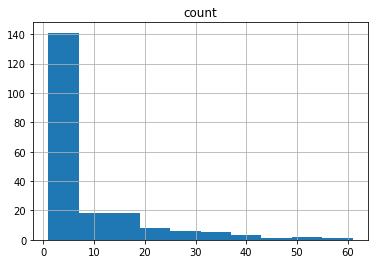

In [11]:
decs=patch_deciles['ObjectNumber']
pd.DataFrame.hist(decs,column='count')